In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
%matplotlib inline

In [276]:
def findmissingnhoods(x):
    res=df["new_nhood"][-df["new_nhood"].isin(x)]
    return res

In [101]:
neigh=gpd.read_file("neighborhoods.geojson")
df=pd.Series(neigh.new_nhood)
df=df.drop_duplicates()
df=df.sort_values()
df=df.reset_index(drop=True)
len(df)

207

# Auctions

In [3]:
auct=pd.read_csv("auctions.csv")
auct.head()

,Unnamed: 0,Address,Closing Date,Council District,Final Sale Amount,Parcel ID,Purchaser Type,Latitude,Longitude,Location,coordinates,neighborhood
0,0,701 Pingree,01/24/2017,5,$10000.00,04002089.,Homebuyer,42.376808,-83.083668,"42.376808, -83.083668",POINT (-83.083668 42.376808),Piety Hill
1,1,8614 Northlawn,02/09/2017,7,$1000.00,18014620.,Investor,42.358337,-83.151738,"42.358337, -83.151738",POINT (-83.15173799999999 42.358337),Barton-McFarland
2,2,414 W Grand Blvd,02/03/2017,6,$20450.00,12009736.,Homebuyer,42.321239,-83.087465,"42.321239, -83.087465",POINT (-83.08746499999999 42.321239),Mexicantown
3,3,2950 Field,03/10/2017,5,$1000.00,17013603.,Homebuyer,42.361539,-83.008997,"42.361539, -83.008997",POINT (-83.00899699999999 42.361539),Islandview
4,4,16166 Westbrook,03/23/2016,1,$3550.00,22109801.,Homebuyer,42.408631,-83.250418,"42.408631, -83.250418",POINT (-83.250418 42.408631),Miller Grove


In [15]:
auct["Final Sale Amount"]=auct["Final Sale Amount"].str.replace("$", "")

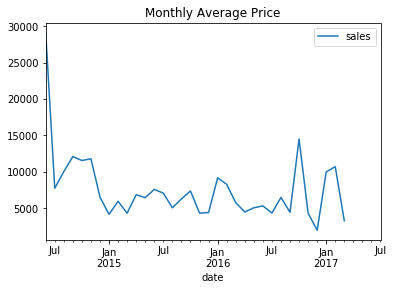

In [16]:
auct["Closing Date"]=pd.to_datetime(auct["Closing Date"])
auct["Final Sale Amount"]=auct["Final Sale Amount"].astype(float)
sales=auct["Final Sale Amount"]
date=auct["Closing Date"]
x=pd.DataFrame(list(zip(date, sales, auct["Purchaser Type"])), columns=["date", "sales", "ptype"])
x.index=x.date
x.resample("M").mean().plot()
plt.title("Monthly Average Price")

2014 marks a huge dip, but the average price stays about the same, with increasing volatility in late 2016 and early 2017

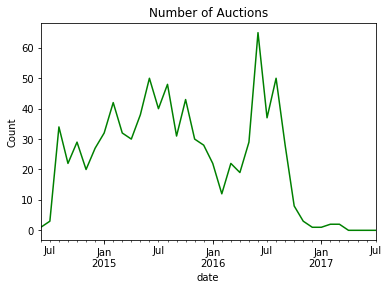

In [17]:
x.resample("M").sales.count().plot(c="g")
plt.title("Number of Auctions")
plt.ylabel("Count")

Seems like a brief spike in auctions in the spring of 2016, but the number of auctions hovers around 40. These two graphs suggest that for the run of this data, there are no specific temporal cycles detectable here, and we can use locational data in aggregate for building the main dataset. 

In [102]:
count=auct.groupby("neighborhood").count()["Unnamed: 0"]
df=pd.DataFrame(df)
count=pd.Series(count)
count=count.reset_index()
df=df.merge(count, left_on="new_nhood", right_on="neighborhood", how="outer")


In [103]:
df=df.drop("neighborhood", axis=1)

In [104]:
df.columns=["new_nhood", "TotalAuctions"]

In [105]:
fsa=auct.groupby("neighborhood")["Final Sale Amount"].mean()
fsa=fsa.to_frame()
fsa=fsa.reset_index()
fsa.columns=["neighborhood", "avg_auct_sale_amount"]


In [106]:
df=df.merge(fsa, left_on="new_nhood", right_on="neighborhood", how="outer")

,new_nhood,TotalAuctions,neighborhood,avg_auct_sale_amount
0,Airport Sub,NaN,NaN,NaN
1,Arden Park,1.0,Arden Park,9500.000000
2,Aviation Sub,7.0,Aviation Sub,7600.000000
3,Bagley,29.0,Bagley,10700.000000
4,Barton-McFarland,18.0,Barton-McFarland,2393.333333
5,Belle Isle,NaN,NaN,NaN
6,Belmont,1.0,Belmont,6500.000000
7,Berg-Lahser,NaN,NaN,NaN
8,Bethune Community,2.0,Bethune Community,4400.000000
9,Blackstone Park,NaN,NaN,NaN


In [107]:
df=df.drop("neighborhood", axis=1)

# Blight

In [6]:
blight=pd.read_csv("blight.csv", encoding='latin-1')
blight.head()

C:\Users\test\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,6,8,9,13,14,29,35,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,TICKET ID,TICKET NUMBER,AGENCY NAME,INSPECTOR NAME,VIOLATOR NAME,VIOLATION STREET NUMBER,VIOLATION STREET NAME,VIOLATION ZIP CODE,MAILING ADDRESS STR NUMBER,...,GRAFITTI STATUS,Violation_address,ParcelNo,PropAddr,LegalDesc,Latitude,Longitude,Location,coordinates,neighborhood
0,0,33155,05023091DAH,"Buildings, Safety Engineering & Env Department","Keys, Edna","JONES, TED",9119,WITT,NaN,8752,...,NaN,9119 WITT,20001947.,9119 WITT,"S WITT 37 MURRERS SUB L18 P56 PLATS, WCR 20/13...",42.297859,-83.129082,"(42.297859202486, -83.1290818796732)",POINT (-83.12908187967319 42.297859202486),Springwells
1,1,36989,05026478DAH,"Buildings, Safety Engineering & Env Department","Thomas, Don","HUCKLEBERRY, DOROTHY",14546,LANNETTE,NaN,28168,...,NaN,14546 LANNETTE,21010269.,14546 LANNETTE,NaN,42.417291,-82.971522,"(42.417291294539, -82.9715216271286)",POINT (-82.9715216271286 42.417291294539),Outer Drive-Hayes
2,2,37563,05006073DAH,Health Department,"Stanford, Elton","BOLDEN, WILLIE",2418,HIGHLAND,NaN,2418,...,NaN,2418 HIGHLAND,10003675.,2418 HIGHLAND,"N HIGHLAND 80 LATHRUPS HOME SUB L31 P8 PLATS, ...",42.388519,-83.115279,"(42.3885189536784, -83.1152790027137)",POINT (-83.11527900271371 42.3885189536784),Dexter-Linwood
3,3,43428,05028717DAH,"Buildings, Safety Engineering & Env Department","Thomas, Don","TURNER, JOHN",3429,BEALS,NaN,3433,...,NaN,3429 BEALS,17010460.,3429 BEALS,W BEALS 19 SCHULTE & KRAMERS SUB L14 P41 PLATS...,42.364957,-83.006200,"(42.3649569037528, -83.0061997548373)",POINT (-83.0061997548373 42.3649569037528),Islandview
4,4,48609,05035919DAH,Health Department,"Davis, Darlene","MURPHY, MALINDAU",9330,SUSSEX,NaN,933,...,NaN,9330 SUSSEX,22045959.,9330 SUSSEX,E SUSSEX 123 PLYMOUTH GARDENS SUB L48 P39 PLAT...,42.363700,-83.193699,"(42.3636995990614, -83.193699278723)",POINT (-83.193699278723 42.3636995990614),We Care Community


In [274]:
blight.columns

Index(['Unnamed: 0', 'TICKET ID', 'TICKET NUMBER', 'AGENCY NAME',
       'INSPECTOR NAME', 'VIOLATOR NAME', 'VIOLATION STREET NUMBER',
       'VIOLATION STREET NAME', 'VIOLATION ZIP CODE',
       'MAILING ADDRESS STR NUMBER', 'MAILING ADDRESS STR NAME', 'CITY',
       'STATE', 'ZIP CODE', 'NON US STR CODE', 'COUNTRY', 'TICKET ISSUED DATE',
       'TICKET ISSUED TIME', 'HEARING DATE', 'HEARING TIME', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'DISPOSITION', 'FINE AMOUNT', 'ADMIN FEE',
       'STATE FEE', 'LATE FEE', 'DISCOUNT AMOUNT', 'CLEAN-UP COST',
       'JUDGMENT AMOUNT', 'PAYMENT AMOUNT', 'BALANCE DUE', 'PAYMENT DATE',
       'PAYMENT STATUS', 'COLLECTION STATUS', 'GRAFITTI STATUS',
       'Violation_address', 'ParcelNo', 'PropAddr', 'LegalDesc', 'Latitude',
       'Longitude', 'Location', 'coordinates', 'neighborhood'],
      dtype='object')

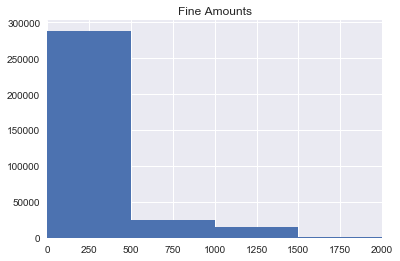

In [304]:
blight["FINE AMOUNT"].hist(bins=20)
plt.xlim(0, 2000)
plt.title("Fine Amounts")

The vast majority of fine amounts are under 500 dollars

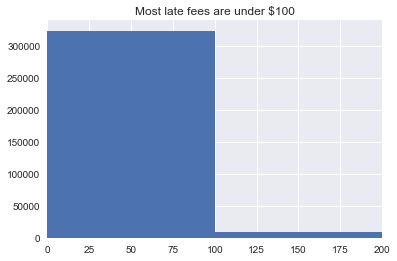

In [309]:
blight["LATE FEE"].hist()
plt.xlim(0,200)
plt.title("Most late fees are under $100")

In [7]:
blight["TICKET ISSUED DATE"]=pd.to_datetime(blight["TICKET ISSUED DATE"], errors="coerce")

In [8]:
ts=pd.DataFrame(list(zip(blight["TICKET ISSUED DATE"], blight["FINE AMOUNT"])), columns=["date", "amount"])

In [9]:
ts.date=pd.to_datetime(ts.date)
ts.index=ts.date

In [32]:
import datetime

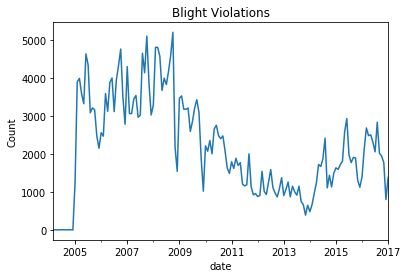

In [40]:
ts=ts[ts.date > "2000"]
ts.date.resample("M").count().plot()
plt.ylabel("Count")
plt.title("Blight Violations")

There has been a significant fall in blight violations from the end of 2008 to 2013 or 2014. Blight violations are on the rise again, but do not equal pre-recession levels. 

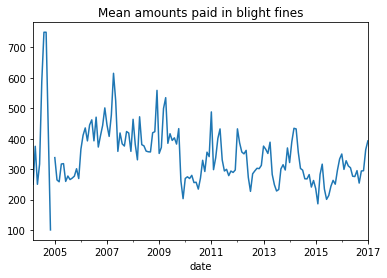

In [46]:
ts.resample("M").amount.mean().plot()
plt.title("Mean amounts paid in blight fines")

The average tended to be a bit higher before the recession, and a bit lower afterwards, but not extremely so

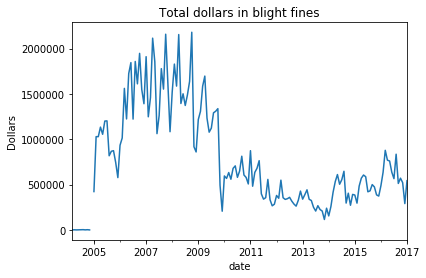

In [49]:
ts.resample("M").amount.sum().plot()
plt.title("Total dollars in blight fines")
plt.ylabel("Dollars")

In absolute terms, there's a major dropoff in fines paid before and after the recession. This suggests that I may actually need two variables here, one pre 2010 and post 2010, to accurately reflect the changing levels and types of blight violations. 

In [117]:
blight_violations=blight.groupby("neighborhood")["Unnamed: 0"].count()
bv=blight_violations.to_frame()
bv=bv.reset_index()
bv.columns=["neighborhood", "blight_violations"]

In [119]:
df=df.merge(bv, left_on="new_nhood", right_on="neighborhood", how="outer")

In [121]:
df=df.drop("Unnamed: 0", axis=1)

In [122]:
df.to_csv("bigddf.csv")

In [5]:
df=pd.read_csv("bigddf.csv")
df=df.drop("Unnamed: 0", axis=1)


,new_nhood,TotalAuctions,avg_auct_sale_amount,blight_violations
0,Airport Sub,NaN,NaN,3974.0
1,Arden Park,1.0,9500.000000,64.0
2,Aviation Sub,7.0,7600.000000,558.0
3,Bagley,29.0,10700.000000,6822.0
4,Barton-McFarland,18.0,2393.333333,6112.0
5,Belle Isle,NaN,NaN,NaN
6,Belmont,1.0,6500.000000,750.0
7,Berg-Lahser,NaN,NaN,644.0
8,Bethune Community,2.0,4400.000000,6592.0
9,Blackstone Park,NaN,NaN,444.0


In [15]:
blight2000s=blight[blight["TICKET ISSUED DATE"] < "2010"]
blight2010s=blight[blight["TICKET ISSUED DATE"] >= "2010"]

In [37]:
blight_vio2000s=blight2000s.groupby("neighborhood")["Unnamed: 0"].count()
blight_vio2010s=blight2010s.groupby("neighborhood")["Unnamed: 0"].count()
blight_vio2000s=blight_vio2000s.to_frame()
blight_vio2010s=blight_vio2010s.to_frame()
blight_vio2000s=blight_vio2000s.reset_index()
blight_vio2010s=blight_vio2010s.reset_index()
blight_vio2010s.columns=["neighborhood", "blightvio2010"]
blight_vio2000s.columns=["neighborhood", "blightvio200s"]


In [41]:
df=df.merge(blight_vio2010s, left_on="new_nhood", right_on="neighborhood", how="left")
df=df.merge(blight_vio2000s, left_on="new_nhood", right_on="neighborhood", how="left")

In [43]:
df=df.drop(["neighborhood_x", "neighborhood_y"], axis=1)

In [45]:
df.to_csv("bigddf.csv")

# Building Permits

In [48]:
perm=pd.read_csv("buildingpermits.csv", encoding="latin1", dtype=str)

In [50]:
perm.columns

Index(['Unnamed: 0', 'PERMIT_NO', 'PERMIT_ISSUED', 'PERMIT_COMPLETED',
       'PERMIT_EXPIRES', 'SITE_ADDRESS', 'PERMIT_STATUS', 'BETWEEN1',
       'PARCEL_NO', 'LOT_NUMBER', 'SUBDIVISION', 'CASE_TYPE',
       'CASE_DESCRIPTION', 'LEGAL_USE', 'ESTIMATED_COST', 'PARCEL_SIZE',
       'PARCEL_CLUSTER_SECTOR', 'STORIES', 'PARCEL_FLOOR_AREA',
       'PARCEL_GROUND_AREA', 'PRC_AKA_ADDRESS', 'BLD_PERMIT_TYPE',
       'BLD_PERMIT_DESC', 'FDICN_DESCRIPTION', 'BLD_TYPE_USE', 'RESIDENTIAL',
       'BLD_TYPE_CONST_COD', 'BLD_ZONING_DIST', 'BLD_USE_GROUP',
       'BLD_BASEMENT', 'FEE_TYPE', 'SEQ_NO', 'CSF_CREATED_BY', 'PCF_AMT_DUE',
       'OWNER_LAST_NAME', 'OWNER_FIRST_NAME', 'OWNER_ADDRESS1',
       'OWNER_ADDRESS2', 'OWNER_CITY', 'OWNER_STATE', 'OWNER_ZIP',
       'CONTRACTOR_LAST_NAME', 'CONTRACTOR_FIRST_NAME', 'CONTRACTOR_ADDRESS1',
       'CONTRACTOR_ADDRESS2', 'CONTRACTOR_CITY', 'CONTRACTOR_STATE',
       'CONTRACTOR_ZIP', 'site_location', 'owner_location',
       'contractor_location', 'CS

In [126]:
perm.PERMIT_ISSUED=perm.PERMIT_ISSUED.str.replace("3017", "2017")
#make some time series data


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [134]:
perm.PERMIT_ISSUED=pd.to_datetime(perm.PERMIT_ISSUED, unit="d")
perm["date"]=perm.PERMIT_ISSUED
type(perm.date[1])

pandas._libs.tslib.Timestamp

In [129]:
perm.ESTIMATED_COST=perm.ESTIMATED_COST.str.replace("$", "")
perm.PARCEL_SIZE=perm.PARCEL_SIZE.astype(float)
perm.PARCEL_GROUND_AREA=perm.PARCEL_GROUND_AREA.astype(float)
buildings=perm.groupby(["neighborhood", "BLD_TYPE_USE"]).count()["Unnamed: 0"].transpose()
buildingtypeuse=buildings.unstack()
buildingtypeuse.to_csv("buildingtypes.csv")

In [121]:
ts=pd.DataFrame([perm["ESTIMATED_COST"], perm["PARCEL_SIZE"], perm["PARCEL_GROUND_AREA"], perm["BLD_TYPE_USE"], perm["date"]], dtype=)

In [152]:
ts=ts.transpose()
ts.columns=["cost", "size", "area", "type", "date"]
ts.date=pd.to_datetime(ts.date)


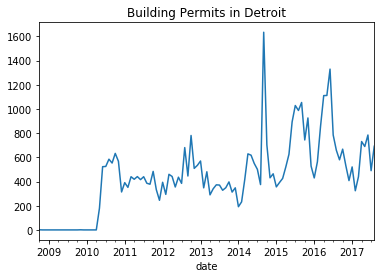

In [172]:
ts=ts.reset_index().set_index("date")
ts.resample("M").type.count().plot()
plt.title("Building Permits in Detroit")

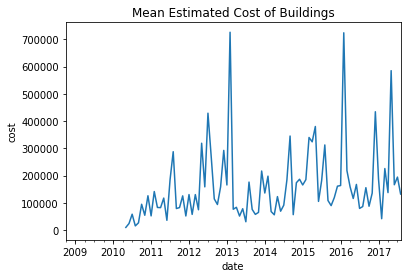

In [174]:
ts.cost=ts.cost.astype(float)
ts.resample("M").cost.mean().plot()
plt.title("Mean Estimated Cost of Buildings")
plt.ylabel("cost")

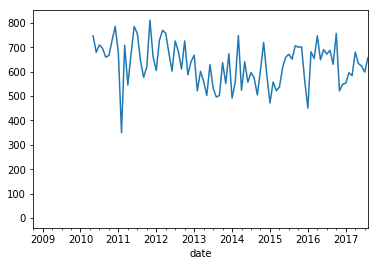

In [169]:
ts.area=ts.area.astype(float)
ts.resample("M").area.mean().plot()

In [196]:
totalbuildings=perm.groupby("neighborhood").count()["Unnamed: 0"]
perm.ESTIMATED_COST=perm.ESTIMATED_COST.astype(float)
avgestimatedcost=perm.groupby("neighborhood")["ESTIMATED_COST"].mean()
area=perm.groupby("neighborhood")["PARCEL_GROUND_AREA"].mean()

In [202]:
df["parcelgroundarea"]=area
df["avgestimatedcostofbuilding"]=avgestimatedcost
df["totalbuildingspermitted"]=totalbuildings

In [203]:
df.to_csv("bigddf.csv")

# Annual Inspections

In [2]:
df=pd.read_csv("bigddf.csv") #reload the database

In [3]:
insp=pd.read_csv("Annual_Inspections.csv")

In [4]:
actions=insp.groupby(["ACTION_DESCRIPTION", "neighborhoods"]).count()["Unnamed: 0"]
actions=actions.unstack().transpose()
extras=actions.reindex(res, fill_value=np.nan)
actions=pd.concat([actions, extras], axis=0)
actions.to_csv("Bulkydatasets/inspectionactions.csv")
#added missing neighborhoods as empty rows, so everything works better togeter

NameError: name 'res' is not defined

In [231]:
def findmissingnhoods(x):
    res=df["new_nhood"][-df["new_nhood"].isin(x)]
    return res
# made a function for finding which neighborhoods are missing

In [38]:
insp["ACTION_DATE"]=insp["ACTION_DATE"].str.replace("5008", "2008")
insp["ACTION_DATE"]=insp["ACTION_DATE"].str.replace("3016", "2016")
insp["ACTION_DATE"]=insp["ACTION_DATE"].str.replace("5009", "2009")
insp["ACTION_DATE"]=pd.to_datetime(insp["ACTION_DATE"])

In [61]:
insp=insp.set_index(pd.DatetimeIndex(insp["ACTION_DATE"]))
grouped=insp.groupby("neighborhoods").resample("AS").count()
grouped=grouped[["neighborhoods", "ACTION_DATE", "Unnamed: 0"]]
grouped=grouped.unstack(level=1)
grouped=grouped.iloc[:, 7:10]

MultiIndex(levels=[['neighborhoods', 'ACTION_DATE', 'Unnamed: 0'], [2008-01-01 00:00:00, 2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00, 2012-01-01 00:00:00, 2013-01-01 00:00:00, 2014-01-01 00:00:00, 2015-01-01 00:00:00, 2016-01-01 00:00:00, 2017-01-01 00:00:00, 2018-01-01 00:00:00, 2019-01-01 00:00:00, 2020-01-01 00:00:00, 2021-01-01 00:00:00, 2022-01-01 00:00:00, 2023-01-01 00:00:00, 2024-01-01 00:00:00, 2025-01-01 00:00:00, 2026-01-01 00:00:00, 2027-01-01 00:00:00, 2028-01-01 00:00:00, 2029-01-01 00:00:00, 2030-01-01 00:00:00]],
           labels=[[0, 0, 0], [7, 8, 9]],
           names=[None, 'ACTION_DATE'])

In [71]:
grouped=grouped.reset_index()
res=findmissingnhoods(grouped.neighborhoods)
extras=grouped.reindex(res, fill_value=np.nan)
inspections=pd.concat([grouped, extras], axis=0)
#reset index, added neighborhoods with no record here

In [76]:
df["inspections2015"]=inspections.inspections2015
df["inspections2016"]=inspections.inspections2016
df["inspections2017"]=inspections["inspections 2017"] #added this all to the datafarem

# Bus Stops

In [103]:
bus=pd.read_csv("busstops.csv")
buscount=bus.groupby("neighborhood").count()["Unnamed: 0"]
busstops=buscount.reset_index()
busstops.columns=["neighborhood", "Number of bus stops"]

In [104]:
res=findmissingnhoods(busstops.neighborhood)
extras=busstops.reindex(res, fill_value=np.nan)
busstops=pd.concat([busstops, extras], axis=0)
df["Number of Bus Stops"]=busstops["Number of bus stops"]

In [105]:
ccp=pd.read_csv("childcareproviders.csv")
ccp=ccp.groupby("neighborhood").count()["Unnamed: 0"]
ccp=ccp.reset_index()
ccp.columns=["neighborhood", "Childcare_Providers"]
res=findmissingnhoods(ccp.neighborhood)
extras=ccp.reindex(res, fill_value=np.nan)
ccp=pd.concat([ccp, extras], axis=0)
df["childcare_providers"]=ccp["Childcare_Providers"]

In [106]:
df.to_csv("bigddf.csv")

#  Fire Stations

In [70]:
df=pd.read_csv("bigddf.csv")

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,new_nhood,TotalAuctions,avg_auct_sale_amount,blight_violations,blightvio2010,blightvio200s,parcelgroundarea,...,Residential Snow Removal Issue,Rodent Extermination - DPW Only,Running Water in a Home or Building,Street Light Pole Down,Traffic Sign Issue,Traffic Signal Issue,Trash Issue - Bulk waste deposited more than 24 hours before designated time,Trash Issue - Refuse container left at curbside between collection days,Tree Issue,Water Main Break
0,0,0.0,0.0,Airport Sub,NaN,NaN,3974.0,1548.0,2426.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,Arden Park,1.0,9500.000000,64.0,17.0,47.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,2.0,Aviation Sub,7.0,7600.000000,558.0,189.0,369.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,3.0,Bagley,29.0,10700.000000,6822.0,4655.0,2167.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,4.0,Barton-McFarland,18.0,2393.333333,6112.0,2112.0,4000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5.0,5.0,Belle Isle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6.0,6.0,Belmont,1.0,6500.000000,750.0,318.0,432.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7.0,7.0,Berg-Lahser,NaN,NaN,644.0,311.0,333.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8.0,8.0,Bethune Community,2.0,4400.000000,6592.0,2172.0,4420.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9.0,9.0,Blackstone Park,NaN,NaN,444.0,162.0,282.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
fs=pd.read_csv("firestations.csv")
fs=fs.groupby("neighborhood").count()["Unnamed: 0"]
fs=fs.reset_index()
fs.columns=["neighborhood", "firestations"]

In [5]:
res=findmissingnhoods(fs.neighborhood)
extras=fs.reindex(res, fill_value=np.nan)
fs=pd.concat([fs, extras], axis=0)
df["firestations"]=fs["firestations"]

# Improve Detroit

In [6]:
improve=pd.read_csv("improveall.csv", encoding="latin1")

C:\Users\test\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
improve.head()

,Unnamed: 0,acknowledged_at,address,city,coordinates,image,issue_description,issue_type,lat,lng,location,neighborhood,neighobrhood,rating,ticket_closed_date_time,ticket_created_date_time,ticket_id,ticket_last_updated_date_time,ticket_status
0,0,04/16/2015 12:49:02 PM,"19130 Bretton Drive Detroit, Michigan",detroit,POINT (-83.22888299999998 42.408494),NaN,NaN,Potholes,42.408494,-83.228883,"(42.408494, -83.228883)",North Rosedale Park,North Rosedale Park,3.0,04/16/2015 02:28:51 PM,04/16/2015 12:46:00 PM,1596625,04/16/2015 02:28:51 PM,closed
1,1,NaN,"S Of 19485 Westbrook Detroit, Michigan",detroit,POINT (-83.252713 42.434139),NaN,Vacant lot S of 19485 Westbrook,Illegal Dump Sites,42.434139,-83.252713,"(42.434139, -83.252713)",Evergreen Lahser 7/8,Evergreen Lahser 7/8,NaN,06/21/2017 03:07:46 PM,06/16/2017 11:10:55 AM,3493735,06/21/2017 03:07:46 PM,closed
2,2,NaN,"16888 Rutherford Street Detroit, MI",detroit,POINT (-83.204289 42.415336),NaN,CAN ON CURB,Curbside Solid Waste Issue,42.415336,-83.204289,"(42.415336, -83.204289)",Crary/St Marys,Crary/St Marys,NaN,06/21/2017 02:31:24 PM,06/16/2017 12:21:27 PM,3493976,06/21/2017 02:31:24 PM,closed
3,3,NaN,"16873 Rutherford Street Detroit, MI",detroit,POINT (-83.204881 42.415129),NaN,CAN ON CURB,Curbside Solid Waste Issue,42.415129,-83.204881,"(42.415129, -83.204881)",Crary/St Marys,Crary/St Marys,NaN,06/21/2017 02:31:38 PM,06/16/2017 12:22:35 PM,3493981,06/21/2017 02:31:38 PM,closed
4,4,NaN,15538 Thatcher Detroit Michigan,detroit,POINT (-83.2003445 42.4213003),NaN,"The neighbors cut the front yard, but the back...",DPW - Other environmental,42.421300,-83.200344,"(42.4213003, -83.2003445)",College Park,College Park,NaN,06/21/2017 02:33:41 PM,06/16/2017 12:30:35 PM,3494033,06/21/2017 02:33:41 PM,closed


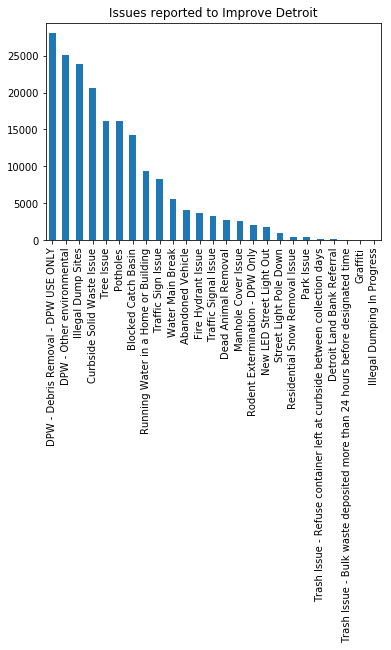

In [8]:
improve=improve[improve.issue_type !='Test (internal use only, public issue)']
improve=improve[improve.issue_type !='Graffiti Abatement (internal use only, public issue)']
improve.issue_type.value_counts().plot(kind="bar")
plt.title("Issues reported to Improve Detroit")

In [9]:
improve.ticket_created_date_time=pd.to_datetime(improve.ticket_created_date_time)

In [10]:
improve.ticket_closed_date_time=pd.to_datetime(improve.ticket_closed_date_time)


In [11]:
from datetime import datetime, timedelta
improve["length_of_ticket"]=improve.ticket_closed_date_time-improve.ticket_created_date_time
improve.length_of_ticket=improve.length_of_ticket/timedelta(days=1)

In [126]:
avgwaittimeimprovdtickets=improve.groupby("neighborhood")["length_of_ticket"].mean()
avgwaittimeimprovdtickets=avgwaittimeimprovdtickets.values
df["avgwaittimeimprovdtickets"]=avgwaittimeimprovdtickets

In [127]:
avgwaittimeimprovdtickets=improve.groupby("neighborhood")["length_of_ticket"].mean()
improveticketsperneighborhood=improve.groupby("neighborhood")["length_of_ticket"].count()
df["avgwaittimeimprovdtickets"]=avgwaittimeimprovdtickets.values
df["improveticketsperneighborhood"]=improveticketsperneighborhood.values

In [128]:
avgimproveratings=improve.groupby("neighborhood")["rating"].mean()
df["avgimproveratings"]=avgimproveratings.values

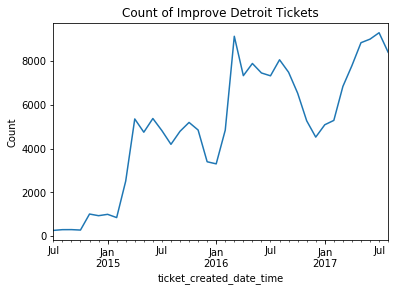

In [14]:
improve=improve.set_index(pd.DatetimeIndex(improve["ticket_created_date_time"]))
improve["Unnamed: 0"].resample("M").count().plot()
plt.title("Count of Improve Detroit Tickets")
plt.ylabel("Count")

Seems like Improve Detroit tickets see a dramatic decline in the winter

In [19]:
improve.issue_type=improve.issue_type.astype("category")
improve["month"]=improve.index.to_period(freq="M")
counts=improve.groupby([improve.month, 'issue_type']).count()

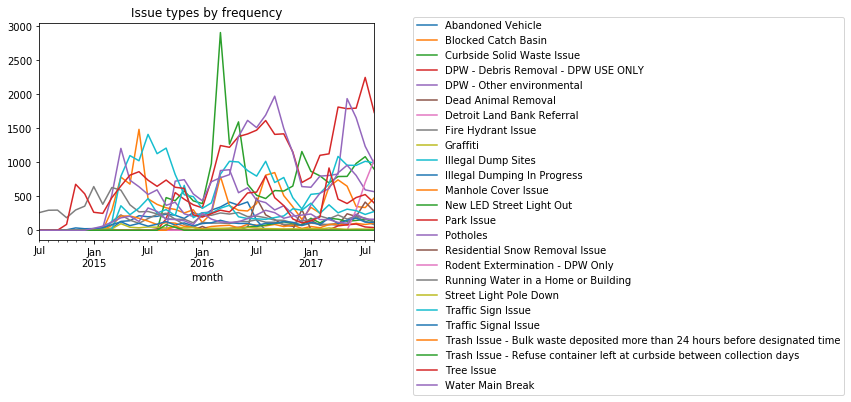

In [37]:
counts=counts.replace(np.nan, 0)
x=counts["Unnamed: 0"].unstack(level=1).plot()
x.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Issue types by frequency")

In [83]:
issues=improve.groupby(["neighborhood", "issue_type"]).count()
issues=issues["Unnamed: 0"].unstack(level=1)
pd.concat([df, issues], axis=1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,new_nhood,TotalAuctions,avg_auct_sale_amount,blight_violations,blightvio2010,blightvio200s,parcelgroundarea,...,Residential Snow Removal Issue,Rodent Extermination - DPW Only,Running Water in a Home or Building,Street Light Pole Down,Traffic Sign Issue,Traffic Signal Issue,Trash Issue - Bulk waste deposited more than 24 hours before designated time,Trash Issue - Refuse container left at curbside between collection days,Tree Issue,Water Main Break
0,0,0.0,0.0,Airport Sub,NaN,NaN,3974.0,1548.0,2426.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,1.0,Arden Park,1.0,9500.000000,64.0,17.0,47.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,2.0,Aviation Sub,7.0,7600.000000,558.0,189.0,369.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,3.0,Bagley,29.0,10700.000000,6822.0,4655.0,2167.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,4.0,Barton-McFarland,18.0,2393.333333,6112.0,2112.0,4000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5.0,5.0,Belle Isle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6.0,6.0,Belmont,1.0,6500.000000,750.0,318.0,432.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7.0,7.0,Berg-Lahser,NaN,NaN,644.0,311.0,333.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8.0,8.0,Bethune Community,2.0,4400.000000,6592.0,2172.0,4420.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9.0,9.0,Blackstone Park,NaN,NaN,444.0,162.0,282.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df=pd.read_csv("bigddf.csv")

In [117]:
lib=pd.read_csv("Libraries.csv") #libraries in each neighbhorhood
lib=lib.groupby("neighborhood").count()["Unnamed: 0"]
lib=lib.reset_index()
lib.columns=["neighborhood", "libraries"]
res=findmissingnhoods(lib.neighborhood)
extras=lib.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "libraries"]
lib=pd.concat([lib, extras], axis=0)
lib=lib.sort_values(by="neighborhood").reset_index(drop=True)
df["libaries"]=lib.libraries

In [130]:
df.to_csv("bigddf.csv")

In [143]:
police=pd.read_csv("policestations.csv")
police=police.groupby("neighborhood").count()["Unnamed: 0"]
police=police.reset_index()
police.columns=["neighborhood", "police_station"]
res=findmissingnhoods(police.neighborhood)
extras=police.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "police_station"]
police=pd.concat([police, extras], axis=0)
police=police.sort_values(by="neighborhood").reset_index(drop=True)
df["police_stations"]=police.police_station

In [148]:
sbs=pd.read_csv("smartbusstops.csv")

In [152]:
sbs=sbs.groupby("neighborhood").count()["Unnamed: 0"]
sbs=sbs.reset_index()
sbs.columns=["neighborhood", "SMARTbus"]
res=findmissingnhoods(sbs.neighborhood)
extras=sbs.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "SMARTbus"]
sbs=pd.concat([sbs, extras], axis=0)
sbs=sbs.sort_values(by="neighborhood").reset_index(drop=True)
df["SMARTbusstops"]=sbs.SMARTbus

# Traffic Signs

In [158]:
traffic=pd.read_csv("trafficsigns.csv")
traffic=traffic.groupby("neighborhood").count()["Unnamed: 0"]
traffic=traffic.reset_index()
traffic.columns=["neighborhood", "traffic_signs"]
res=findmissingnhoods(traffic.neighborhood)
extras=traffic.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "traffic_signs"]
traffic=pd.concat([traffic, extras], axis=0)
traffic=traffic.sort_values(by="neighborhood").reset_index(drop=True)

In [165]:
df=df.drop('traffic_signs_average', axis=1)

In [194]:
nt=traffic.groupby(["neighborhood", "refname"]).count()["Unnamed: 0"]
nt=nt.unstack(level=1)
nt=nt.reset_index()
nt.columns=["neighborhood", "signalsignct", "stopsignct", "yieldsignct"]
res=findmissingnhoods(nt.neighborhood)
extras=nt.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "signalsignct", "stopsignct", "yieldsignct"]
nt=pd.concat([nt, extras], axis=0)
nt=nt.sort_values(by="neighborhood").reset_index(drop=True)
df=pd.concat([df, nt], axis=1)
df=df.drop("neighborhood", axis=1)

In [195]:
df.to_csv("bigddf.csv")

In [196]:
df=pd.read_csv("bigddf.csv")

In [199]:
buil=pd.read_csv("buildingtypes.csv")

In [201]:
df=pd.concat([df, buil], axis=1)

# Crime data

In [203]:
crime=pd.read_csv("allcrimes0916.csv")

C:\Users\test\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [210]:
len(crime.NEIGHBORHOOD.unique())

158

In [233]:
df["new_nhood"]=df["new_nhood"].str.lower()
crimes.NEIGHBORHOOD=crimes.NEIGHBORHOOD.str.lower()
res=df["new_nhood"][-df["new_nhood"].isin(crimes.NEIGHBORHOOD)]

In [248]:
crimes=crime.groupby(["NEIGHBORHOOD", "OFFENSEDESCRIPTION"]).count()["Unnamed: 0"]
crimes=crimes.unstack(level=1)
crimes=crimes.reset_index()
extras=crimes.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
crimes.NEIGHBORHOOD=crimes.NEIGHBORHOOD.str.lower()
crimes.to_csv("crimes.csv")

In [247]:
crimes=pd.concat([crimes, extras], axis=0)
print(crimes.NEIGHBORHOOD)

0      arden park/east boston
1             atkinson-euclid
2                      bagley
3                balduck park
4            barton mcfarlane
5                  belle isle
6                 berg-lasher
7               boston-edison
8                     boynton
9                   bricktown
10                     briggs
11                 brightmoor
12                 brush park
13                    burbank
14               carbon works
15               castle rouge
16                    cerveny
17              chandler park
18                      chene
19               city airport
20                   claytown
21                   clemente
22             conant gardens
23                     conner
24           conner creek ind
25                     cooley
26                  core city
27                   corktown
28                    crosman
29            cultural center
                ...          
100                       NaN
101                       NaN
102       

In [225]:
df=pd.concat([df, nt], axis=1)
df=df.drop("neighborhood", axis=1)

207

# Property Values

In [6]:
pv=pd.read_csv("propertyvalues.csv", encoding="latin1")

C:\Users\test\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [265]:
pv.columns

Index(['Unnamed: 0', 'Ward', 'ParcelNo', 'PropAddr', 'SaleDate', 'SalePrice',
       'PropNo', 'PropDir', 'PropStr', 'PropZip', 'Taxpayer1', 'Taxpayer2',
       'TPAddr', 'TPCity', 'TPState', 'TPZip', 'PropClass', 'TaxStatus',
       'TotSqFt', 'TotAcres', 'Frontage', 'Depth', 'PRE', 'CIBYrBuilt',
       'ResYrBuilt', 'IsImproved', 'SEV', 'AV', 'TV', 'LegalDesc', 'Latitude',
       'Longitude', 'Location', 'coordinates', 'neighborhood'],
      dtype='object')

In [21]:
pv.AV=pv.AV.str.replace("$", "")
pv.AV=pv.AV.astype(float)

In [22]:
pv.TV=pv.TV.str.replace("$", "")
pv.TV=pv.AV.astype(float)

207

In [23]:
pv=pv[pv.TaxStatus=="TAXABLE"]


In [341]:
houseprice=pv.groupby("neighborhood")["AV"].median()
houseprice=houseprice.reset_index()

,neighborhood,AV
0,Airport Sub,4700.0
1,Arden Park,39800.0
2,Aviation Sub,13500.0
3,Bagley,17100.0
4,Barton-McFarland,9700.0
5,Belmont,11400.0
6,Berg-Lahser,14800.0
7,Bethune Community,9600.0
8,Blackstone Park,11100.0
9,Boston Edison,29400.0


In [320]:
neigh=traffic.neighborhood.unique()
neigh=sorted(neigh, key=str)
df.new_nhood=neigh

In [321]:
len(houseprice)

204

In [332]:
houseprice=houseprice.drop(["level_0", "index"], axis=1)

In [342]:
res=findmissingnhoods(houseprice.neighborhood)
extras=houseprice.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "AV"]
houseprice=pd.concat([houseprice, extras], axis=0)
houseprice=houseprice.sort_values(by="neighborhood").reset_index(drop=True)
df["2016medianassessmentvalue"]=houseprice.AV #code for median/mean assessed value

In [343]:
df.to_csv("bigddf.csv")

In [24]:
pv.columns
pv["dollarspersqft2016"]=pv.TotSqFt/pv.AV

C:\Users\test\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
pricesqft=pv.groupby("neighborhood")["dollarspersqft2016"].mean()
pricesqft=pricesqft.reset_index()
res=findmissingnhoods(pricesqft.neighborhood)
extras=pricesqft.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "dollarspersqft2016"]
pricesqft=pd.concat([pricesqft, extras], axis=0)
pricesqft=pricesqft.sort_values(by="neighborhood").reset_index(drop=True)
df["dollarspersqft2016"]=pricesqft["dollarspersqft2016"] #code for mean price per sq ft

In [3]:
df=pd.read_csv("bigddf.csv")

In [30]:
pv.columns

Index(['Unnamed: 0', 'Ward', 'ParcelNo', 'PropAddr', 'SaleDate', 'SalePrice',
       'PropNo', 'PropDir', 'PropStr', 'PropZip', 'Taxpayer1', 'Taxpayer2',
       'TPAddr', 'TPCity', 'TPState', 'TPZip', 'PropClass', 'TaxStatus',
       'TotSqFt', 'TotAcres', 'Frontage', 'Depth', 'PRE', 'CIBYrBuilt',
       'ResYrBuilt', 'IsImproved', 'SEV', 'AV', 'TV', 'LegalDesc', 'Latitude',
       'Longitude', 'Location', 'coordinates', 'neighborhood',
       'dollarspersqft2016'],
      dtype='object')

In [29]:
plotsize=pv.groupby("neighborhood")["TotAcres"].mean()
plotsize=plotsize.reset_index()
res=findmissingnhoods(plotsize.neighborhood)
extras=plotsize.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "TotAcres"]
plotsize=pd.concat([plotsize, extras], axis=0)
plotsize=plotsize.sort_values(by="neighborhood").reset_index(drop=True)
df["sizeofproperty"]=plotsize["TotAcres"]

In [40]:
#finds the average age of housing stock in a neighborhood
pv.ResYrBuilt=pv.ResYrBuilt.replace(0, np.nan)
builpv=pv[pv.ResYrBuilt.notnull()]


C:\Users\test\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
aybhs=builpv.groupby("neighborhood")["ResYrBuilt"].mean().round()
aybhs=aybhs.reset_index()
res=findmissingnhoods(aybhs.neighborhood)
extras=aybhs.reindex(res, fill_value=np.nan)
extras=extras.reset_index()
extras=extras.drop("neighborhood", axis=1)
extras.columns=["neighborhood", "ResYrBuilt"]
aybhs=pd.concat([aybhs, extras], axis=0)
aybhs=aybhs.sort_values(by="neighborhood").reset_index(drop=True)
df["averageyearofhousingbuilt"]=aybhs["ResYrBuilt"]

In [101]:
pv=pv[pv.SaleDate.notnull()]

AttributeError: 'DataFrame' object has no attribute 'SaleDate'

In [103]:
pv=pd.read_csv("propertyvalues.csv", encoding="latin1")
pv.SaleDate=pd.to_datetime(pv.SaleDate)


C:\Users\test\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
x=pd.to_datetime("01-01-2000")
pv2000s=pv[pv.SaleDate > x]
pv2000s.SalePrice=pv2000s.SalePrice.str.replace("$", "")
pv2000s.SalePrice=pv2000s.SalePrice.astype(float)

C:\Users\test\Anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
pv.groupby("neighborhood")["SalePrice"].mean()

neighborhood
Airport Sub                5.221049e+04
Arden Park                 9.635315e+04
Aviation Sub               3.921880e+04
Bagley                     5.125018e+04
Barton-McFarland           2.680944e+04
Belmont                    2.465760e+04
Berg-Lahser                5.424102e+04
Bethune Community          2.922938e+04
Blackstone Park            4.035428e+04
Boston Edison              7.624342e+04
Boynton                    4.325877e+05
Brightmoor                 3.393126e+04
Brush Park                 3.892784e+05
Buffalo Charles            2.639023e+04
Butler                     3.308174e+04
Cadillac Community         3.318420e+04
Cadillac Heights           1.592988e+04
Campau/Banglatown          2.399447e+04
Carbon Works               2.018725e+05
Castle Rouge               4.261009e+04
Central Southwest          3.722595e+04
Chadsey Condon             3.259530e+04
Chalfonte                  1.865714e+04
Chandler Park              2.121439e+04
Chandler Park-Chalmers     

In [151]:
r=pd.to_datetime("12-31-1967")
pv=pv[pv.SaleDate > r]
nspyr=pv.groupby([pv["SaleDate"].map(lambda x: x.year),"neighborhood"])["SalePrice"].mean()


In [180]:
nspyr=pd.DataFrame(nspyr)
nspyr=nspyr.reset_index(level=1)

In [190]:
nspyr=nspyr.reset_index(level=0)
nspyr.to_csv("salespricesdetroit.csv")


In [239]:
nspyr=pd.read_csv("salespricesdetroit.csv")

In [242]:
nspyr=nspyr.pivot(index="neighborhood",columns="SaleDate", values="SalePrice")


In [248]:
nspyr=nspyr.reset_index()

In [254]:
res=findmissingnhoods(nspyr.neighborhood)
extras=nspyr.reindex(res, fill_value=np.nan)
extras=extras.reset_index

SaleDate,new_nhood,neighborhood,1968,1969,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Brewster Homes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Garden View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
extras.drop("neighorhood")

In [258]:
nspyr.to_csv("salespricesdetroit.csv")

In [231]:
nspyr=nspyr.reset_index()

In [235]:
nspyr[nspyr.SaleDate == 1968][["neighborhood", "SalePrice"]]

,neighborhood,SalePrice
180,Airport Sub,9698.308357
181,Aviation Sub,18949.352941
182,Bagley,20249.930233
183,Barton-McFarland,14910.572414
184,Belmont,16746.217391
185,Berg-Lahser,30000.000000
186,Bethune Community,15621.192053
187,Blackstone Park,16186.666667
188,Boston Edison,17061.111111
189,Boynton,11014.882353


In [262]:
for i in df.new_nhood:
    print(i)

Airport Sub
Arden Park
Aviation Sub
Bagley
Barton-McFarland
Belmont
Berg-Lahser
Bethune Community
Blackstone Park
Boston Edison
Boynton
Brewster Homes
Brightmoor
Brush Park
Buffalo Charles
Butler
Cadillac Community
Cadillac Heights
Campau/Banglatown
Carbon Works
Castle Rouge
Central Southwest
Chadsey Condon
Chalfonte
Chandler Park
Chandler Park-Chalmers
Claytown
College Park
Conant Gardens
Conner Creek
Conner Creek Industrial
Core City
Corktown
Cornerstone Village
Crary/St Marys
Cultural Center
Davison
Davison-Schoolcraft
Delray
Denby
Detroit Golf
Dexter-Fenkell
Dexter-Linwood
Douglass
Downtown
East Canfield
East English Village
East Village
Eastern Market
Eden Gardens
Elijah McCoy
Eliza Howell
Elmwood Park
Evergreen Lahser 7/8
Evergreen-Outer Drive
Far West Detroit
Farwell
Fiskhorn
Fitzgerald/Marygrove
Five Points
Forest Park
Fox Creek
Franklin
Franklin Park
Garden Homes
Garden View
Gateway Community
Gold Coast
Grand River-I96
Grand River-St Marys
Grandmont
Grandmont #1
Grant
Gratiot 

In [269]:
pv.columns

Index(['Unnamed: 0', 'Ward', 'ParcelNo', 'PropAddr', 'SaleDate', 'SalePrice',
       'PropNo', 'PropDir', 'PropStr', 'PropZip', 'Taxpayer1', 'Taxpayer2',
       'TPAddr', 'TPCity', 'TPState', 'TPZip', 'PropClass', 'TaxStatus',
       'TotSqFt', 'TotAcres', 'Frontage', 'Depth', 'PRE', 'CIBYrBuilt',
       'ResYrBuilt', 'IsImproved', 'SEV', 'AV', 'TV', 'LegalDesc', 'Latitude',
       'Longitude', 'Location', 'coordinates', 'neighborhood'],
      dtype='object')

In [274]:
df.to_csv("bigddf.csv")

# Smaller Crime dataset

In [277]:
maj=pd.read_csv("dpd201114.csv")

In [278]:
maj.columns

Index(['Unnamed: 0', 'ROWNUM', 'CATEGORY', 'OFFENSEDESCRIPTION',
       'STATEOFFENSEFILECLASS', 'INCIDENTDATE', 'HOUR', 'SCA', 'PRECINCT',
       'NEIGHBORHOOD', 'CENSUSTRACT', 'LOCATION', 'lats', 'long',
       'coordinates', 'neighborhood'],
      dtype='object')

In [280]:
maj.INCIDENTDATE=pd.to_datetime(maj.INCIDENTDATE)

In [281]:
maj["year"]=maj.INCIDENTDATE.map(lambda x: x.year)

In [283]:
majcrimes=maj.groupby(["neighborhood", "year", "CATEGORY"]).count()

In [286]:
majcrimes=majcrimes.unstack(level=1).unstack(level=1)

In [287]:
majcrimes.to_csv("majorcrime1114.csv")

# 2016 Crime Data

In [288]:
crim=pd.read_csv("dpd201617.csv")

In [295]:
crim=crim.groupby(["neighborhood", "Offense Category"]).count().unstack(level=1)


KeyError: 'Offense Category'

In [302]:
crim=crim.iloc[:,0:6]

In [303]:
crim.to_csv("dpd201617.csv")